In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
file_path = r"C:\Users\gupta\OneDrive\Desktop\archive (1)\Iris.csv"
df = pd.read_csv(file_path)


In [13]:
#Dataset Exploration - Initial Inspection
print("\nDataset Head:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Descriptive Statistics:")
print(df.describe())


Dataset Head:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage

In [14]:
#Check and Handle Duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
# Drop duplicate rows if any
df = df.drop_duplicates()



Number of duplicate rows: 0


In [15]:
#Drop Unnecessary Columns
df = df.drop(columns=['Id'], errors='ignore')

In [16]:
#Data Types
print("\nData Types:")
print(df.dtypes)



Data Types:
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


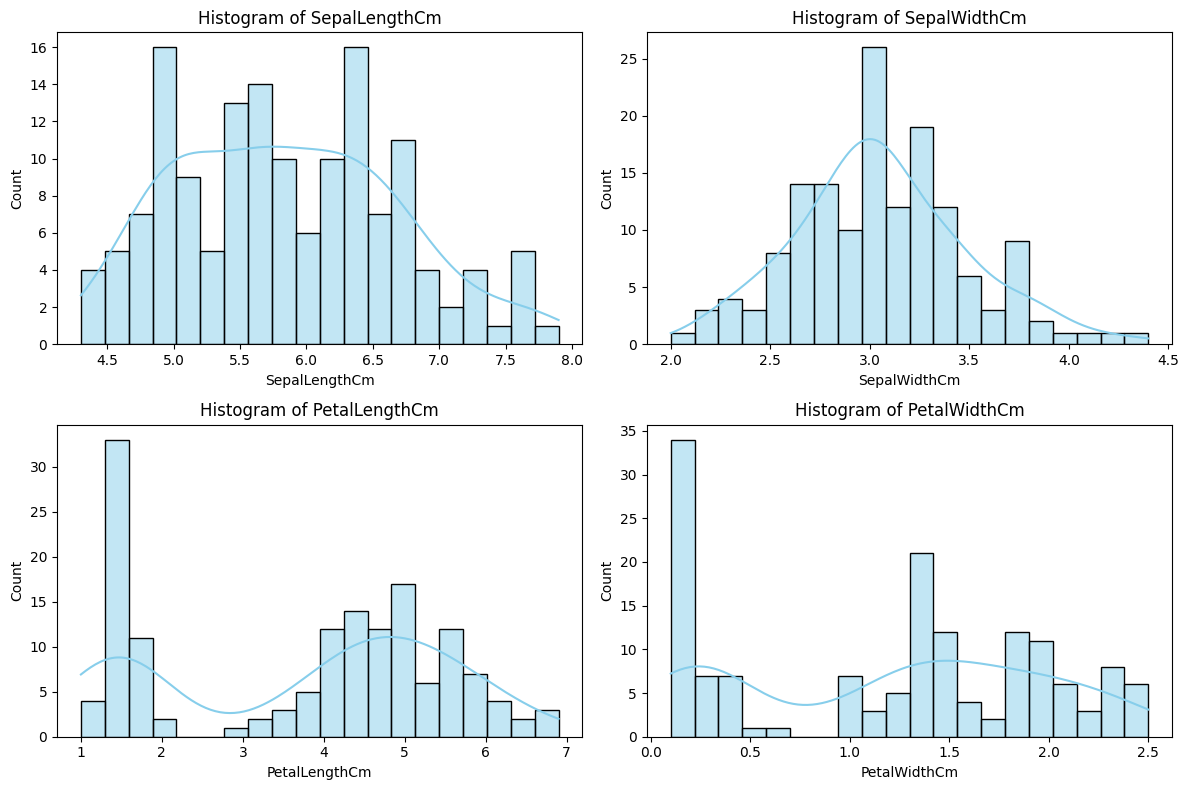

In [17]:
#Data Visualization - Histograms
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, bins=20, color='skyblue')
    plt.title(f"Histogram of {column}")
plt.tight_layout()
plt.show()


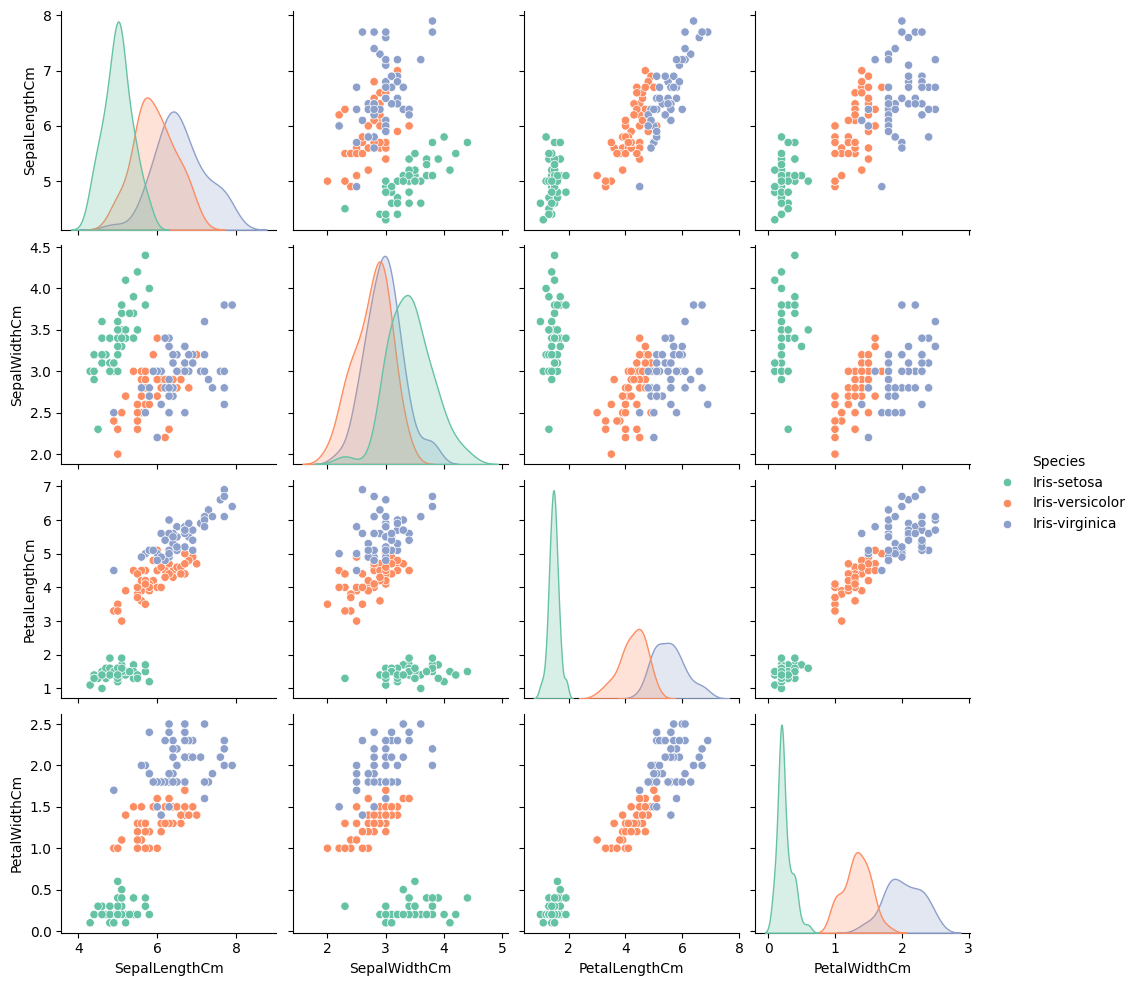

In [18]:
#Data Visualization - Pair Plot
sns.pairplot(df, hue='Species', palette='Set2', diag_kind='kde')
plt.show()

C:\Users\gupta\AppData\Local\Temp\ipykernel_24696\1144107113.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=column, data=df, palette='Set3')
C:\Users\gupta\AppData\Local\Temp\ipykernel_24696\1144107113.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=column, data=df, palette='Set3')
C:\Users\gupta\AppData\Local\Temp\ipykernel_24696\1144107113.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=column, data=df, palette='Set3')
C:\Users\gupta\AppData\Local\Temp\ipykernel_24696\1144107113.py:

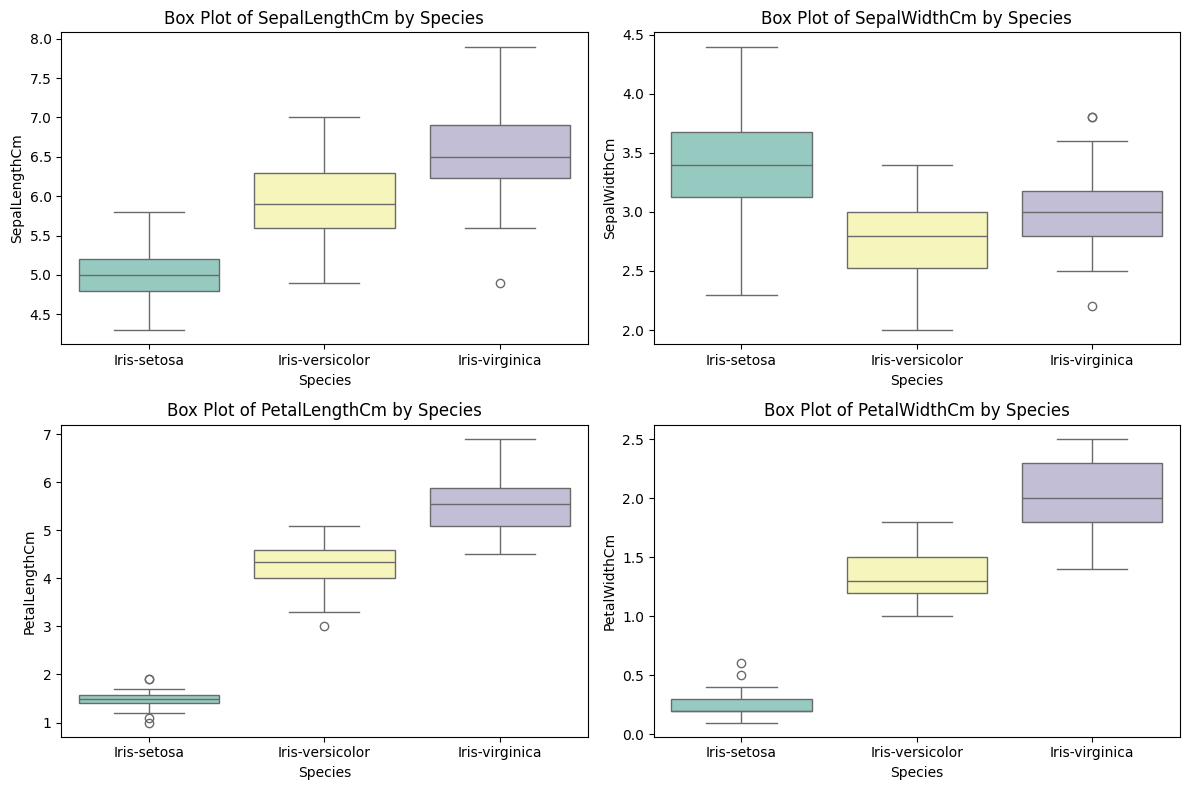

In [19]:

#Data Visualization - Box Plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=column, data=df, palette='Set3')
    plt.title(f"Box Plot of {column} by Species")
plt.tight_layout()
plt.show()



Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


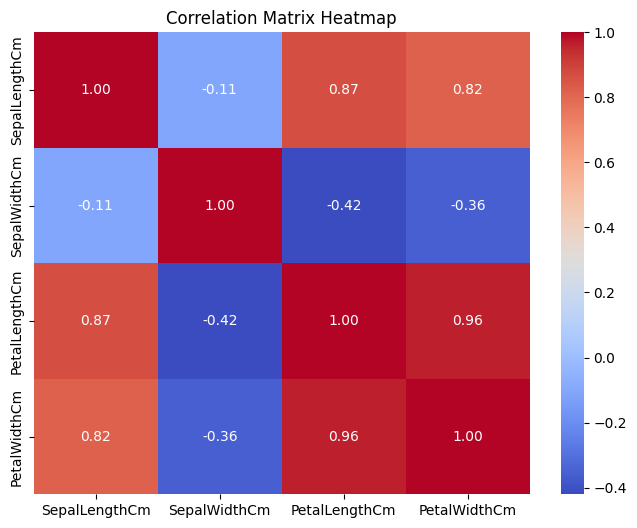

In [20]:
#Data Analysis - Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [21]:

#Initial Observations and Species Distribution
species_counts = df['Species'].value_counts()
print("\nSpecies Distribution:")
print(species_counts)



Species Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


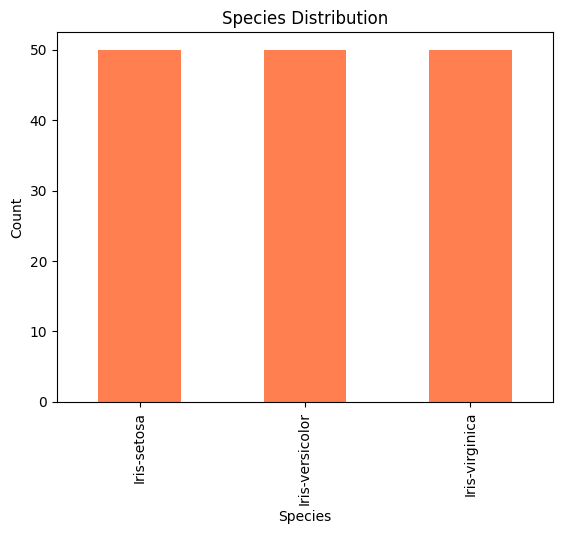

In [22]:
# Display class balance
species_counts.plot(kind='bar', color='coral')
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()